In [7]:
import requests
import pandas as pd
import io
import collections
from itertools import combinations
import networkx as nx
pd.options.display.max_colwidth = 100
import seaborn as sns
from matplotlib import pyplot as plt

In [8]:
#Importing useful function. For details, check the associated course

!wget https://raw.githubusercontent.com/Yquetzal/Teaching_notebooks/main/Networks/HALfunctions.py
from HALfunctions import get_all_elements, co_occurence_network,co_occurence_network_laboratory,column_most_common,bi_partite_network,bi_partite_network_generic

--2021-11-17 21:30:20--  https://raw.githubusercontent.com/Yquetzal/Teaching_notebooks/main/Networks/HALfunctions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7868 (7,7K) [text/plain]
Saving to: ‘HALfunctions.py.12’

HALfunctions.py.12  100%[===================>]   7,68K  --.-KB/s    in 0s      

2021-11-17 21:30:21 (24,0 MB/s) - ‘HALfunctions.py.12’ saved [7868/7868]



# Faire la requête

In [20]:
# Here, detail the request. This exmaple: articles whose abstract contains "easy", 
# published between 2020 et 2022, at l'université de Lyon.

domain="UNIV-LYON/"
words="title_t:(easy)"
dates="[2020 TO 2022]"
columns="title_s,authFullName_s,structAcronym_s,structCountry_s,structAddress_s,structType_s,structName_s,level1_domain_s,keyword_s"

request = "http://api.archives-ouvertes.fr/search/"+domain+"?q="+words+"&fq=publicationDate_s:"+dates+"&fl="+columns
simple_example = get_all_elements(request)
simple_example

Nombre d'éléments au total :  3
Éléments récupérés :  3


,title_s,authFullName_s,structAcronym_s,structCountry_s,structAddress_s,structType_s,structName_s,level1_domain_s,keyword_s
0,Standing on a Double-Seesaw Device is an Easy Way to Modify the Coordination Between the Two Fee...,"Patrice Rougier,Thibaud Coquard,Thierry Paillard,Clément Ankaoua,Jeanne Dury,Corentin Barthod,Do...","LIBM,UCBL,UJM,USMB [Université de Savoie] [Université de Chambéry],MEPS,UPPA,MPR,CHU","fr,fr,fr,fr,fr,fr,fr,fr,fr",CAMPUS SANTE INNOVATIONS - Bâtiment IRMIS - 10 rue de la Marandière 42270 Saint Priest en Jarez ...,"laboratory,institution,regroupinstitution,institution,institution,laboratory,institution,laborat...","Laboratoire Interuniversitaire de Biologie de la Motricité,Université Claude Bernard Lyon 1,Univ...",sdv.neu,NaN
1,Easy Synthesis of Complex Biomolecular Assemblies: Wheat Germ Cell-Free Protein Expression in St...,"Marie-Laure Fogeron,Lauriane Lecoq,Laura Cole,Matthias Harbers,Anja Böckmann","MMSB,UCBL,CNRS,RIKEN IMS,RIKEN","fr,fr,fr,fr,jp,jp","IBCP CNRS/Université de Lyon7 Passage du vercors69367 LYON Cedex 07,43\, boulevard du 11 novembr...","laboratory,institution,regroupinstitution,institution,institution,regroupinstitution",Microbiologie moléculaire et biochimie structurale | Molecular Microbiology and Structural Bioch...,"chim.anal,sdv.bbm,sdv.bbm","Cell-free protein expression,Wheat germ,Structural biology,Labeling,NMR"
2,"Codabench: Flexible\, Easy-to-Use and Reproducible Benchmarking for Everyone","Zhen Xu,Huan Zhao,Wei-Wei Tu,Magali Richard,Sergio Escalera,Isabelle Guyon","TIMC,VAS,CNRS,UGA,Grenoble INP,UGA,UB,LISN,CNRS","cn,us,fr,fr,fr,fr,fr,fr,es,fr,fr,fr,fr","Beijing\, China,Domaine de la Merci\, 38706 La Tronche\, France,Université de Lyon\, VetAgro Sup...","institution,institution,laboratory,institution,institution,regroupinstitution,institution,regrou...","4Paradigm,Chalearn,Translational Innovation in Medicine and Complexity | Recherche Translationne...",info.info-lg,NaN


# Create co-occurence networks of elements in articles

In [21]:
# Network with nodes = authors, link if appear in same article
g1 = co_occurence_network(exemple_facile,"authFullName_s",threshold=0)

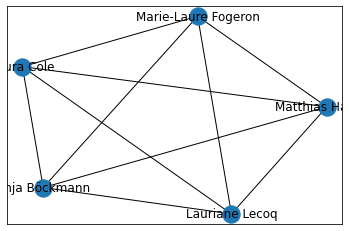

In [22]:
nx.draw_networkx(g1)

In [23]:
# Same, with keywords
g2 = co_occurence_network(exemple_facile,"keyword_s",threshold=0)

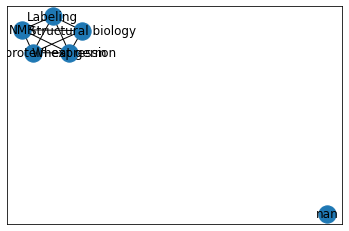

In [24]:
nx.draw_networkx(g2)

In [25]:
# Same, with scientific domains
g3 = co_occurence_network(exemple_facile,"level1_domain_s",threshold=0)

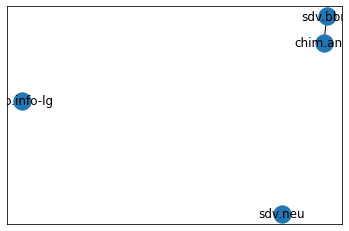

In [26]:
nx.draw_networkx(g3)

# Bi-partite networks
Bi-partite networks have 2 types of nodes. A typical example is with articles as one type of nodes, and some element of the article as another type of nodes


In [32]:
# Bipartite network Article-authors
g5 = bi_partite_network_generic(exemple_facile,"title_s","authFullName_s")

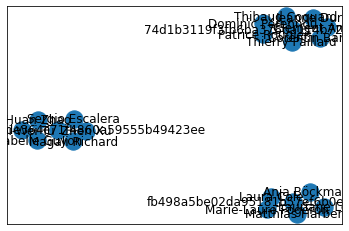

In [33]:
nx.draw_networkx(g5)

In [30]:
# Bipartite network Article-scientific domain
g5 = bi_partite_network_generic(exemple_facile,"title_s","level1_domain_s")

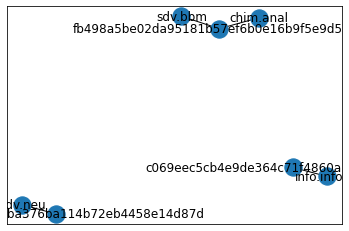

In [31]:
nx.draw_networkx(g5)

In [34]:
#domain - keywords
g6 = bi_partite_network_generic(exemple_facile,"level1_domain_s","keyword_s",threshold_max_in_col=10)


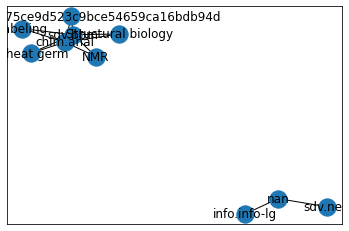

In [35]:
nx.draw_networkx(g6)

In [37]:
# to remove edges appearing less than k times
k=2
to_remove = [(a,b) for a, b, attrs in g6.edges(data=True) if attrs["occurrences"] <k]
g6.remove_edges_from(to_remove)
g6.remove_nodes_from(list(nx.isolates(g6)))

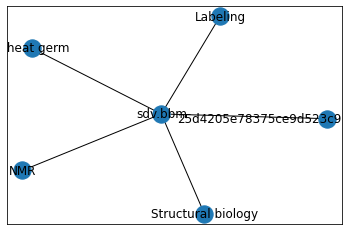

In [38]:
nx.draw_networkx(g6)

# Exporting file to open it in Gephi
With this c. Si vous êtes dans Google Colab, c'est dans le panneau de gauche, il faut le rafraichir pour le voir apparaître.

In [18]:
nx.write_graphml(g1,"exemple1.graphml")
nx.write_graphml(g6,"exemple6.graphml")